In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# preprocessing 

I concluded from the eda that both the unemploment data 'independent variables' and the crime total ' dependent variable' both poses an element of seasonality. 
the seasonality dictate plenty in terms of prediction especially for the modeling part.linear regression wouldn't be a great model due to the seasonality issue. Hence, my advisor recomended that we use ARIMA model to ecorporate the seasonality within our prediction. Therefore, my preprocessing will only be data normalization then running a linear regression to extract feature importance since the our dataframe doesn't have plenty of significant features to run through 

In [5]:
df=pd.read_csv('preprocessing_ready.csv')
df.head()

,date,sexual,violent,property,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,crime_rate,UR-2,unemployment_extension
0,2006-01-01,45,466,972,121900,113900,8000,6.5,1483,0,0,6.082855,6.4,0
1,2006-02-01,18,301,532,122100,113800,8300,6.8,851,0,0,3.484848,6.3,0
2,2006-03-01,6,114,215,121900,114100,7800,6.4,335,0,0,1.374077,6.2,0
3,2006-04-01,18,347,688,122300,114600,7700,6.3,1053,0,0,4.304988,6.2,0
4,2006-05-01,43,712,1315,122900,115200,7600,6.2,2070,0,0,8.421481,6.7,0


# eliminating redundant features 

Crime Rate , UR2 are features that I have created to compare the data, they are just another representation of the data 'useless' 

In [7]:
df.drop(['UR-2','crime_rate'],axis=1,inplace=True )

sexual , violent , property are types of crimes that are summed up in the Ctotal column. they were first extracted in that form for EDA purposes. since the current model is only seeking to predict total of crimes, these feature are not necessary, although could be useful to produce predictions for them if the crime model is looking to provide location services 

In [10]:
df.drop(['sexual','violent','property'],axis=1,inplace=True)

# feature importance 

to explore feature importance we will implement two different methods : \
    The first is correlation test\
    The second is linear regression coefficient test 

In [13]:
df.set_index('date',inplace=True)

In [15]:
df.corr()

,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,unemployment_extension
Labor Force,1.000000,0.817084,0.290646,0.172748,0.632129,-0.181263,-0.056737,-0.181263
Employed,0.817084,1.000000,-0.314076,-0.426111,0.595829,-0.477087,-0.187329,-0.477087
Unemployed,0.290646,-0.314076,1.000000,0.991639,0.052478,0.493134,0.215033,0.493134
UR,0.172748,-0.426111,0.991639,1.000000,-0.028189,0.541515,0.247132,0.541515
ctotal,0.632129,0.595829,0.052478,-0.028189,1.000000,-0.335718,0.042920,-0.335718
lockdown,-0.181263,-0.477087,0.493134,0.541515,-0.335718,1.000000,0.329234,1.000000
e_stimulus,-0.056737,-0.187329,0.215033,0.247132,0.042920,0.329234,1.000000,0.329234
unemployment_extension,-0.181263,-0.477087,0.493134,0.541515,-0.335718,1.000000,0.329234,1.000000


<AxesSubplot:>

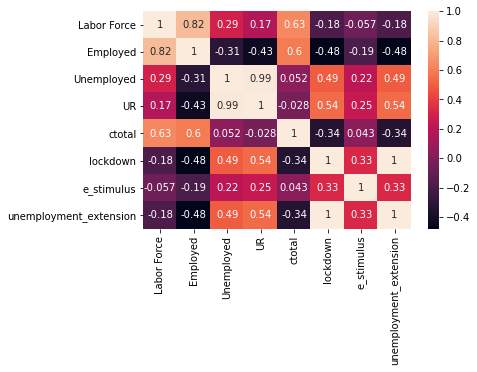

In [17]:
sns.heatmap(df.corr(),annot=True)

largest coorelations with crime total are:\
    1 - Labor force at 0.63\
    2_ Employed at 0.6 \
    3_ Unemployed  0.052
    

In [21]:
df.head()

,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,unemployment_extension
date,,,,,,,,
2006-01-01,121900,113900,8000,6.5,1483,0,0,0
2006-02-01,122100,113800,8300,6.8,851,0,0,0
2006-03-01,121900,114100,7800,6.4,335,0,0,0
2006-04-01,122300,114600,7700,6.3,1053,0,0,0
2006-05-01,122900,115200,7600,6.2,2070,0,0,0


In [24]:
X=df.drop('ctotal',axis=1)
y=df['ctotal']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)


In [25]:
model=LinearRegression()
model.fit(X_train,y_train)
preds=model.predict(X_test)

In [60]:
mean_squared_error(y_test,preds)

157566.6074255985

# determining model's important features! 

In [61]:
model.coef_

array([ 2.86858997e-02,  1.55981442e-03,  2.40403397e-01, -2.63870085e+02,
       -2.98573804e+02,  3.12046366e+02, -2.98573804e+02])

it seems that both, the coorelation test the linear regression agree that UR ,LockDown, and Unemployment extension are less useful than the other features.  

In [64]:
df.to_csv('Modeling_ready.csv')

# finding the lags and setting differencing 

In [67]:
def adfuller_test(data):
    result=adfuller(data)
    labels=['ADF test statistic','P-value','#lags used','Number of Observations Used']
    for value,label in zip(result,labels):
        print (label+':'+str(value))
    if result[1]<=0.05 :
        print ('strong evidence against null hypothesis (h0),reject Null hypothesis, Data is not stationary')
    else :
        print ('weak evidence against null hypothesis,time series has a unit root, idicating data is not stationary')
    

In [68]:
adfuller_test(df['ctotal'])

ADF test statistic:-0.7332092516561007
P-value:0.8379590783774005
#lags used:12
Number of Observations Used:168
weak evidence against null hypothesis,time series has a unit root, idicating data is not stationary


data is not stationary ! 

differencing 

In [72]:
#making the first difference 
df['ctatl_differicnced1']=df['ctotal']-df['ctotal'].shift(1)

In [73]:
df.head()

,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,unemployment_extension,ctatl_differicnced1
date,,,,,,,,,
2006-01-01,121900,113900,8000,6.5,1483,0,0,0,NaN
2006-02-01,122100,113800,8300,6.8,851,0,0,0,-632.0
2006-03-01,121900,114100,7800,6.4,335,0,0,0,-516.0
2006-04-01,122300,114600,7700,6.3,1053,0,0,0,718.0
2006-05-01,122900,115200,7600,6.2,2070,0,0,0,1017.0


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '2019-01-01'),
  Text(0.0, 0, '2006-01-01'),
  Text(25.0, 0, '2008-02-01'),
  Text(50.0, 0, '2010-03-01'),
  Text(75.0, 0, '2012-04-01'),
  Text(100.0, 0, '2014-05-01'),
  Text(125.0, 0, '2016-06-01'),
  Text(150.0, 0, '2018-07-01'),
  Text(175.0, 0, '2020-08-01'),
  Text(200.0, 0, '')])

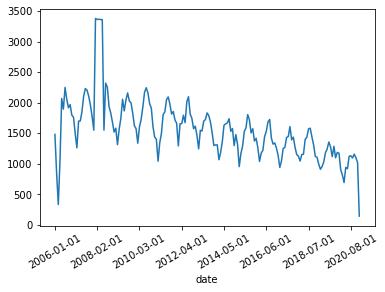

In [76]:
df['ctotal'].plot()
plt.xticks(rotation=30)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '2019-01-01'),
  Text(0.0, 0, '2006-01-01'),
  Text(25.0, 0, '2008-02-01'),
  Text(50.0, 0, '2010-03-01'),
  Text(75.0, 0, '2012-04-01'),
  Text(100.0, 0, '2014-05-01'),
  Text(125.0, 0, '2016-06-01'),
  Text(150.0, 0, '2018-07-01'),
  Text(175.0, 0, '2020-08-01'),
  Text(200.0, 0, '')])

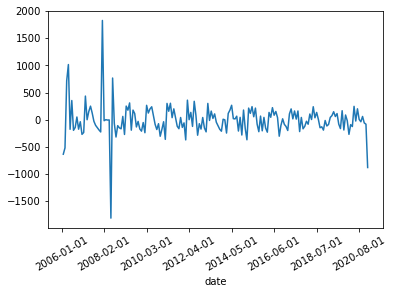

In [77]:
df['ctatl_differicnced1'].plot()
plt.xticks(rotation=30)

In [84]:
df.ctatl_differicnced1.dropna().astype(int)

date
2006-02-01    -632
2006-03-01    -516
2006-04-01     718
2006-05-01    1017
2006-06-01    -174
              ... 
2020-09-01     -35
2020-10-01      62
2020-11-01     -57
2020-12-01     -80
2021-01-01    -877
Name: ctatl_differicnced1, Length: 180, dtype: int32

# lags 

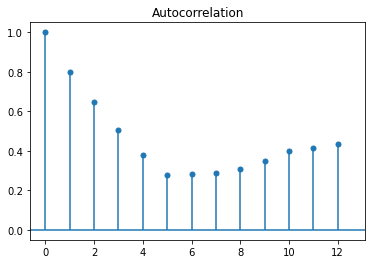

In [90]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df.ctotal, alpha=1, lags=12)
plt.show()

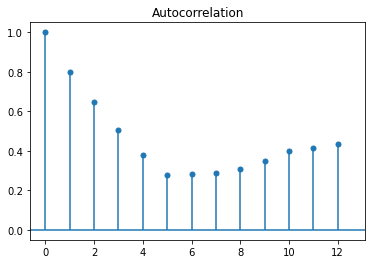

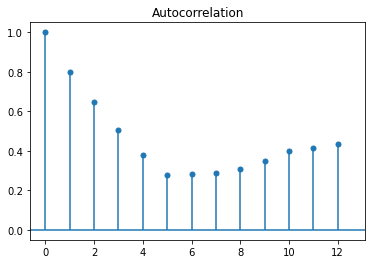

In [114]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df.ctotal,alpha=1,lags=12)


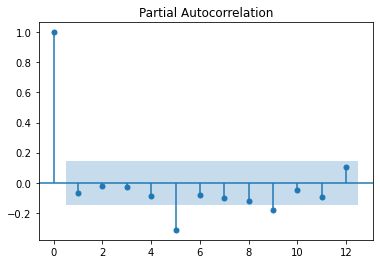

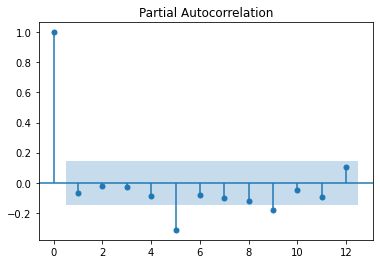

In [113]:
plot_pacf(df.ctatl_differicnced1.dropna(),lags=12,alpha=0.05)

p=1
d=1
1=0,1
lags=12